## Regresión lineal vs KNN

El método de regresión lineal o modelo lineal sienta las bases de un paradigma que surge con Carl Friedrich Gauss, quien a la edad de 18 años propuso el primer algoritmo para llevarla a cabo. El astrónomo Giusseppe Piazzi midió la posición de Ceres durante 40 días, posteriormente varios intentaron predecir la trayectoria de Ceres usando estos datos y las ecuaciones de movimiento de Kepler, sin embargo, debido a la dificultad en su resolución resultó que los cálculos más exactos fueron los realizados con Gauss a partir del método de regresión lineal. Este método parte del siguiente planteamiento:

Dado un experimento donde controlamos $N$ variables independientes de naturaleza categórica o numérica se desea evaluar la relación de éstas con $M$ variables dependientes de naturaleza numérica. En el caso de la regresión lineal simple se tiene que $M=1$ y es el caso más comúnmente abordado, cuando $M>1$ se dice que se tiene un modelo de regresión lineal múltiple o multivariada. 

Esta variable dependiente está constituida por $n$ observaciones experimentales, en donde cada una está caracterizada a su vez por un vector de variables independientes. En el caso del dataset anterior tendríamos que la Altura y la Edad son las variables independientes, mientras que el Peso es la dependiente (¿tendría sentido de otra manera?).

In [ ]:
# Loading libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Loading datasets
db = pd.read_csv("alturas_pesos.csv")# Este dataset está junto con el notebook de KNN
db

,ALTURA,EDAD,PESO
0,5.00,45,77.0
1,5.11,26,47.0
2,5.60,30,55.0
3,5.90,34,59.0
4,4.80,40,72.0
5,5.80,36,60.0
6,5.30,19,40.0
7,5.80,28,60.0
8,5.50,23,45.0
9,5.60,32,58.0


## Exploración gráfica de los datos

Si hacemos dos gráficos bidimensionales para cada variable independiente vs la variable dependiente podemos tratar de identificar alguna relación que nos recuerde alguna función matemática conocida.

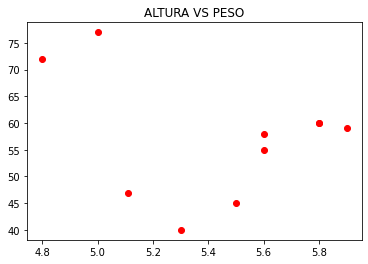

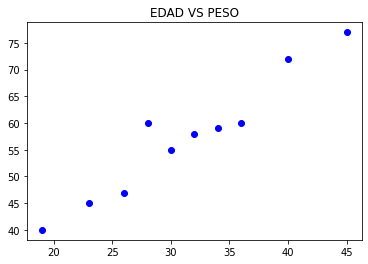

In [ ]:
# Plotting Height vs Weight

prediction = db.iloc[10,0:2]# Data to predict
data = db.iloc[0:10,:]# Data for modelling
x_1 = data['ALTURA']
x_2 = data['EDAD']
y = data['PESO']

# Plot outputs
fig,ax = plt.subplots()
ax.set_title("ALTURA VS PESO")
ax.scatter(x_1, y,  color='red')

fig,ax1 = plt.subplots()
ax1.set_title("EDAD VS PESO")
ax1.scatter(x_2, y,  color='blue')

Debido a que la variable de Edad y Peso parecen estar linealmente correlacionadas, construiremos primero el modelo sólo considerando a esta. Para esto primero dividimos nuestros datos en conjunto de prueba y entrenamiento.

In [ ]:
train = data.iloc[0:7,:]# Training set
x_train = train.iloc[:,1:2]# Seleccionando la columna de Edad
y_train = train.iloc[:,2]# Seleccionando la columna de Peso

test = data.iloc[7:10,:]# Test set
x_test = test.iloc[:,1:2]
y_test = test.iloc[:,2]

Ajustamos el modelo lineal a los datos de entrenamiento (de momento dejemos el algoritmo como caja negra) y los ponemos a prueba sobre los datos de prueba.

Coefficients: 
 [1.46998124]
Mean squared error (over testing set): 24.91
Coefficient of determination (over testing set): 0.44


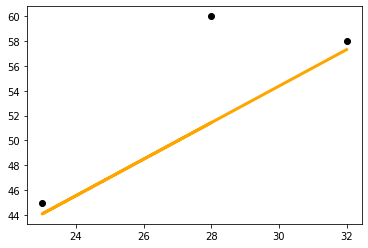

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y1_pred = regr.predict(x_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error (over testing set): %.2f'
      % mean_squared_error(y_test, y_pred))# This is equivalente to RMSE from las notebook of KNN
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (over testing set): %.2f'
      % r2_score(y_test, y_pred))

fig,ax2 = plt.subplots()
ax2.scatter(x_test, y_test,  color='black')
ax2.plot(x_test, y_pred, color='orange', linewidth=3)

En el gráfico anterior podemos observar que sobre el conjunto de prueba:

0. La pendiente de la recta ajustada es positiva.
1. los tres puntos predichos tienen un RMSE (Residuals Mean Squared Error) de 24.91 el cual es un valor mayor que cualquiera de los obtenidos para los distintos valores de K de KNN (ver notebook de KNN). 
2. El coeficiente de determinación o $r^2$ representa el porcentaje de variación intrínseca de los datos (porcentaje de varianza) que está siendo explicado o rescatado por el modelo. En este caso es de 44%.

Sin embargo, cómo son estas mismas métricas obtenidas sobre el conjunto de entrenamiento:

Coefficients: 
 [1.46998124]
Mean squared error (over training set): 3.79
Coefficient of determination (over training set): 0.97


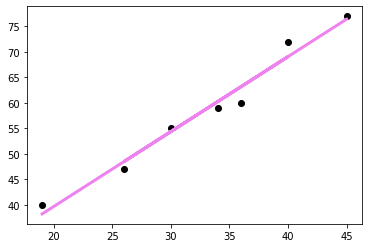

In [ ]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error (over training set): %.2f'
      % mean_squared_error(y_train, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (over training set): %.2f'
      % r2_score(y_train, y1_pred))

fig,ax3 = plt.subplots()
ax3.scatter(x_train, y_train,  color='black')
ax3.plot(x_train, y1_pred, color='violet', linewidth=3)

plt.show()

Podemos observar que:

0. La pendiente de la recta es la misma y que de hecho su ajuste proviene de estos datos.
1. El RMSE es menor que cualquiera obtenido para alguna de los valores de K probados en el ejemplo de KNN.
2. El coeficiente de determinación es del 97%.

Esto es interesante, ya que uno esperaría que para unos valores tan "buenos" de RMSE y $r^2$ el modelo se comportaría al menos así de bien en el conjunto de prueba, sin embargo esto no es así. Por lo que puede ocurrir que en el conjunto de entrenamiento estemos sufriendo de lo que se conoce como "overfitting" o sobreajuste y por lo tanto el modelo está demasiado "apegado" a los datos y nuevas observaciones caen demasiado lejos de su horizonte predictivo.

Si predecimos el valor de peso dada la edad de prueba tenemos:

In [ ]:
prediction[1]# Eligiendo el peso de prueba

38.0

In [ ]:
regr.predict(prediction[1].reshape(1,-1))# Obteniendo predicción a partir del Peso

array([66.13133208])

Ahora bien ¿qué ocurre si construimos la regresión considerando Altura y Edad?:

In [ ]:
train = data.iloc[0:7,:]# Training set
x_train = train.iloc[:,0:2]# Seleccionando la columna de Edad y la de Altura
y_train = train.iloc[:,2]# Seleccionando la columna de Peso

test = data.iloc[7:10,:]# Test set
x_test = test.iloc[:,0:2]
y_test = test.iloc[:,2]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y1_pred = regr.predict(x_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error (over testing set): %.2f'
      % mean_squared_error(y_test, y_pred))# This is equivalente to RMSE from las notebook of KNN
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (over testing set): %.2f'
      % r2_score(y_test, y_pred))
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error (over training set): %.2f'
      % mean_squared_error(y_train, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (over training set): %.2f'
      % r2_score(y_train, y1_pred))
print("")
print("Predicción considerando Altura y Edad:")
print(prediction)
print(regr.predict(prediction.to_numpy().reshape(1, -1)))

Coefficients: 
 [-3.48629862  1.43555431]
Mean squared error (over testing set): 34.07
Coefficient of determination (over testing set): 0.23
Coefficients: 
 [-3.48629862  1.43555431]
Mean squared error (over training set): 2.04
Coefficient of determination (over training set): 0.99

Predicción considerando Altura y Edad:
ALTURA     5.5
EDAD      38.0
Name: 10, dtype: float64
[65.46121708]


Podemos observar que los valores de RMSE y $r^2$ tienen cambios interesantes ya que sobre el conjunto de prueba el modelo se desempeña peor considerando la Edad y la Altura, que sólo considerando la Edad. Mientras que sobre el conjunto de entrenamiento, tanto el RMSE como la $r^2$ mejoran en comparación con el caso antes analizado.

**MORALEJA: No siempre (de hecho casi nunca) querremos valores de $r^2$ muy altos combinados con valores de RMSE bajos ya que estaremos cayendo probablemente en un caso de "OVERFITTING" o sobreajuste. A veces menos es más.**

**REFLEXIÓN: ¿Es mejor utilizar KNN o Regresión lineal para este problema?**

No se pierda el próximo episodio en donde explicaremos a detalle el algoritmo de la regresión lineal, es decir el método de Mínimos Cuadrados para que se entienda de dónde salen los números antes mostrados. Aunado a esto les recomiendo consultar la siguiente liga en donde hablan de 30 aspectos importantes de la regresión lineal: https://www.analyticsvidhya.com/blog/2017/07/30-questions-to-test-a-data-scientist-on-linear-regression/?utm_source=feed&utm_medium=feed-articles&utm_campaign=feed